In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
derecho = pd.read_csv('derecho_RAW_AF7_RAW_AF8.csv')
izquierdo = pd.read_csv('izquierdo_RAW_AF7_RAW_AF8.csv')
ambos = pd.read_csv('ambos_RAW_AF7_RAW_AF8.csv')
test = pd.read_csv('test_RAW_AF7_RAW_AF8.csv')

#Separa X e Y del dataset
X_izquierdo = izquierdo.iloc[:, 1:3].values
X_derecho = derecho.iloc[:, 1:3].values
X_ambos = ambos.iloc[:, 1:3].values
X_test = test.iloc[:,1:3].values



In [3]:
# ASIGNACION DE Y=1 A PARTIR DE ANALISIS ESTADISTICO
Y_izq = np.zeros(len(X_izquierdo))
for i in range (1,len(X_izquierdo)):
    if np.mean(X_izquierdo)*1.05<np.mean(X_izquierdo[i]):
        Y_izq[i]=1
    if np.mean(X_izquierdo)*0.95>np.mean(X_izquierdo[i]):
        Y_izq[i]=1

        
Y_der = np.zeros(len(X_derecho))
for i in range (1,len(X_derecho)):
    if np.mean(X_derecho)*1.05<np.mean(X_derecho[i]):
        Y_der[i]=2
    if np.mean(X_derecho)*0.95>np.mean(X_derecho[i]):
        Y_der[i]=2
        
Y_ambos = np.zeros(len(X_ambos))
for i in range (1,len(X_ambos)):
    if np.mean(X_ambos)*1.05<np.mean(X_ambos[i]):
        Y_ambos[i]=3
    if np.mean(X_ambos)*0.95>np.mean(X_ambos[i]):
        Y_ambos[i]=3


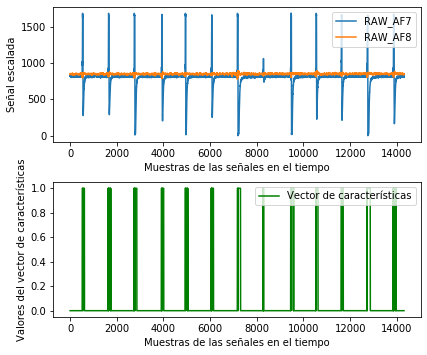

In [4]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X_izquierdo)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Señal escalada")

plt.subplot(212)
[y_izq]=plt.plot(Y_izq, 'g')
plt.legend([y_izq], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()


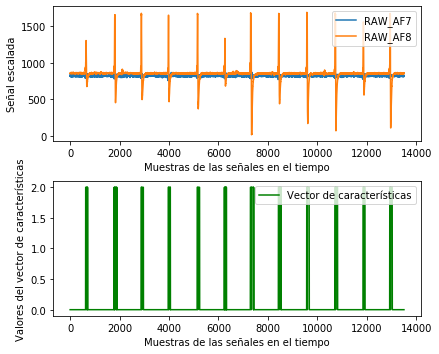

In [5]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X_derecho)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Señal escalada")

plt.subplot(212)
[y_der]=plt.plot(Y_der, 'g')
plt.legend([y_der], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

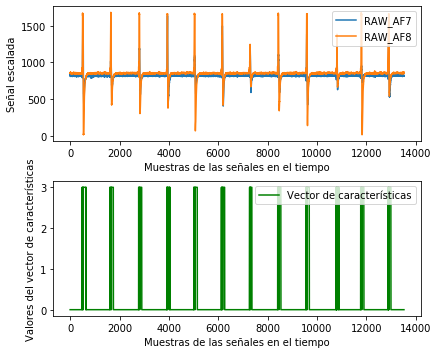

In [6]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X_ambos)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Señal escalada")

plt.subplot(212)
[y_ambos]=plt.plot(Y_ambos, 'g')
plt.legend([y_ambos], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

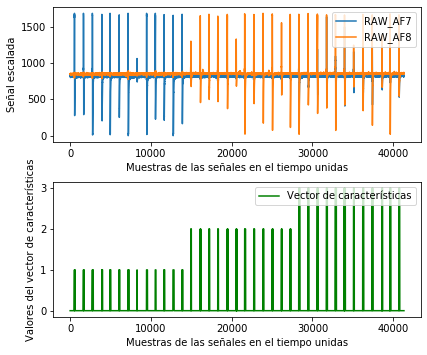

In [7]:
X=np.concatenate((X_izquierdo,X_derecho, X_ambos))
Y=np.concatenate((Y_izq,Y_der, Y_ambos))

plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo unidas")
plt.ylabel("Señal escalada")

plt.subplot(212)
[y]=plt.plot(Y, 'g')
plt.legend([y], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo unidas")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()


In [8]:
from sklearn.svm import SVC 

svm_model_linear = SVC(gamma='scale', decision_function_shape='ovo').fit(X, Y) 
print(svm_model_linear.score(X, Y))


0.9945085516607398


In [9]:
svm_predictions = svm_model_linear.predict(X_test)


In [10]:
def round(n):
    dec = n - int(n)
    rst = int(n) if dec < 0.5 else int(n)+1
    return rst

inicio=0
fin=0
svm_predictions_processed=np.zeros(len(svm_predictions))

for i in range(len(svm_predictions)):
    if svm_predictions[i]!=0 and np.sum(svm_predictions[i-50:i-1])==0:
        inicio=i
    if svm_predictions[i]==0 and np.sum(svm_predictions[i:i+50])==0 and inicio!=0:
        fin=i
    if fin-inicio>50:
        svm_predictions_processed[inicio:fin] = round(np.mean(svm_predictions[inicio:fin]))
        inicio=0
        fin=0


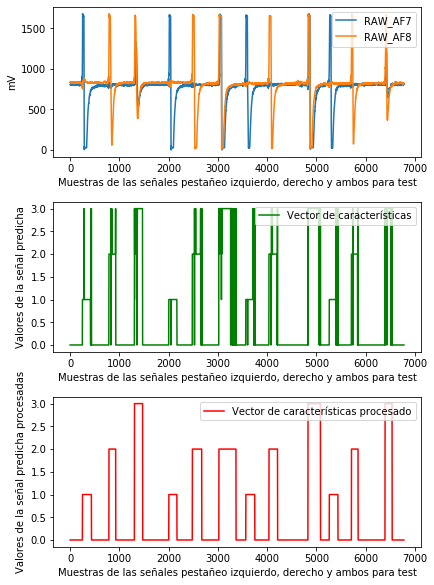

In [11]:
plt.figure()

plt.subplot(311)
[af7,af8] = plt.plot(X_test)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.ylabel("mV")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(312)
[pred]=plt.plot(svm_predictions, 'g')
plt.legend([pred], ["Vector de características"], loc=1)
plt.ylabel("Valores de la señal predicha")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(313)
[pred_proc]=plt.plot(svm_predictions_processed,'r')
plt.legend([pred_proc], ["Vector de características procesado"], loc=1)
plt.ylabel("Valores de la señal predicha procesadas")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplots_adjust(top=2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',optimizer=sgd)

model.fit(X, Y, epochs=10, batch_size=5000)

Using TensorFlow backend.
W1104 22:32:07.319447 18552 deprecation_wrapper.py:119] From c:\users\matias tibaldo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1104 22:32:07.336434 18552 deprecation_wrapper.py:119] From c:\users\matias tibaldo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1104 22:32:07.338397 18552 deprecation_wrapper.py:119] From c:\users\matias tibaldo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1104 22:32:07.355377 18552 deprecation_wrapper.py:119] From c:\users\matias tibaldo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensor

Epoch 1/10
41337/41337 [==============================] - 7s 164us/step - loss: 0.6595
Epoch 2/10
41337/41337 [==============================] - 6s 156us/step - loss: 0.5621
Epoch 3/10
41337/41337 [==============================] - 6s 155us/step - loss: 0.4980
Epoch 4/10
41337/41337 [==============================] - 6s 153us/step - loss: 0.4770
Epoch 5/10
41337/41337 [==============================] - 6s 155us/step - loss: 0.4742
Epoch 6/10
41337/41337 [==============================] - 6s 155us/step - loss: 0.4742
Epoch 7/10
41337/41337 [==============================] - 7s 159us/step - loss: 0.4733
Epoch 8/10
41337/41337 [==============================] - 6s 153us/step - loss: 0.4726
Epoch 9/10
41337/41337 [==============================] - 6s 153us/step - loss: 0.4720
Epoch 10/10
41337/41337 [==============================] - 6s 156us/step - loss: 0.4717


In [14]:

preds = model.predict(X_test)

scaler = MinMaxScaler(feature_range=(0,3))
scaler.fit(preds)
preds = scaler.transform(preds)

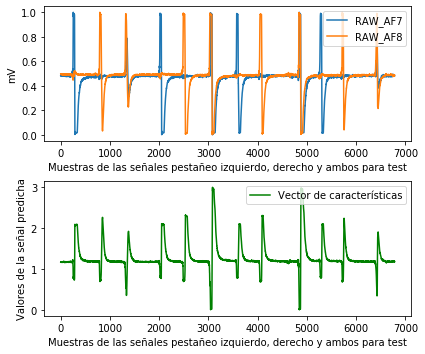

In [15]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X_test)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.ylabel("mV")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplot(212)
[pred]=plt.plot(preds, 'g')
plt.legend([pred], ["Vector de características"], loc=1)
plt.ylabel("Valores de la señal predicha")
plt.xlabel('Muestras de las señales pestañeo izquierdo, derecho y ambos para test')

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()
